<a href="https://colab.research.google.com/github/sovank/DevOpsPortfolio/blob/main/Day_116_Kubernetes_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Kubernetes Namespace

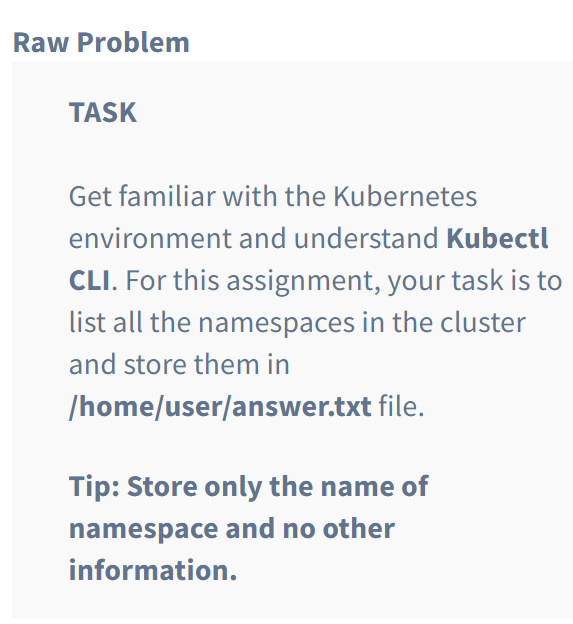

In [ ]:
kubectl get namespaces | awk ' NR>1 { print $1 }' > /home/user/answer.txt

# NR>1 this conditions ensures that the print operation is done for record number(lines) which are greater than 1



---



# Q2. Pods in Kubernetes

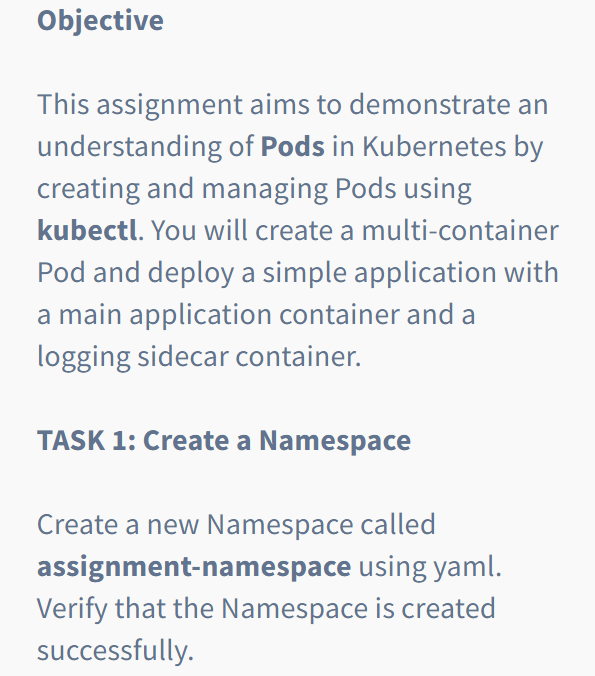

In [ ]:
kubectl create ns assignment-namespace

# or

vi namespace.yaml

apiVersion: v1
kind: Namespace
metadata:
name: assignment-namespace

kubectl apply -f namespace.yaml

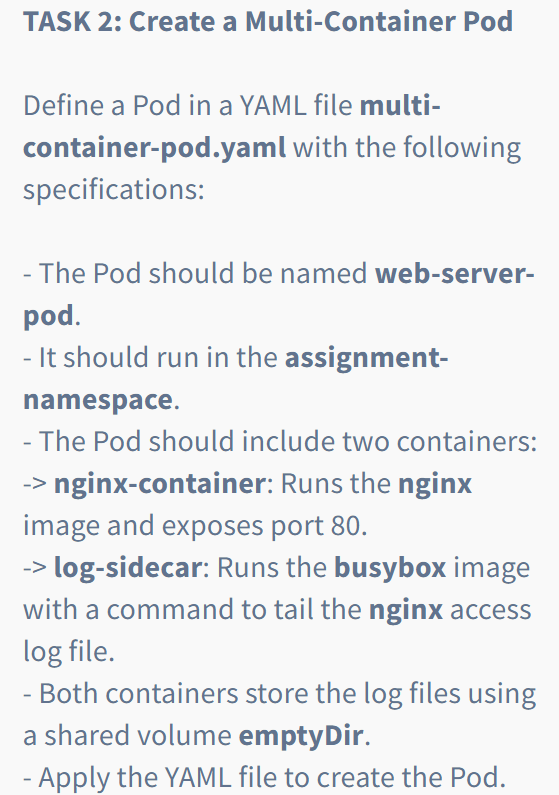

In [ ]:
kind: Pod
apiVersion: v1
metadata:
  name: web-server-pod
  namespace: assignment-namespace
spec:
  containers:
    - name: nginx-container
      image: nginx
      ports:
        - containerPort: 80
      volumeMounts:
        - name: shared-logs
          mountPath: /var/log/nginx
    - name: log-sidecar
      image: busybox
      command: ["sh" , "-c", "tail -f /var/log/nginx/access.log"]
      volumeMounts:
        - name: shared-logs
          mountPath: /var/log/nginx

  volumes:
    - name: shared-logs
      emptyDir: {}



---



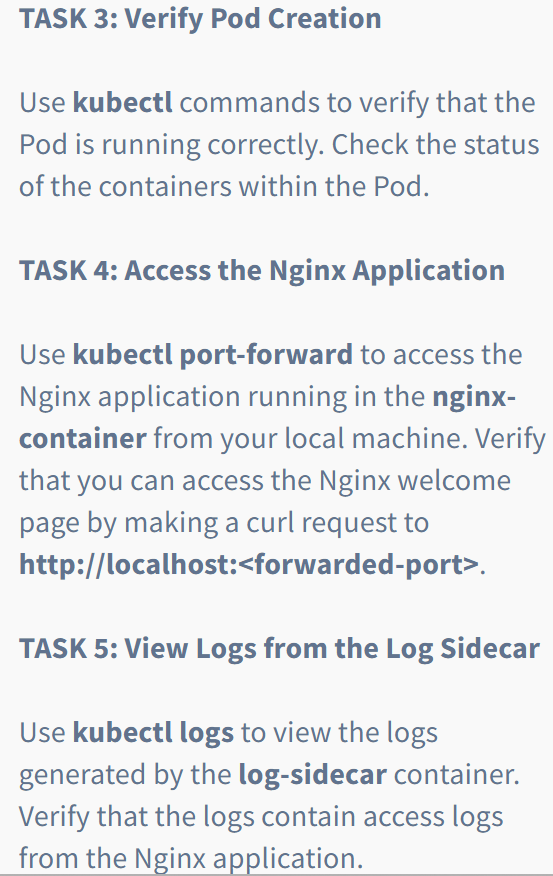

In [ ]:
kubectl get pods -n assignment-namespace
# NAME             READY   STATUS    RESTARTS   AGE
# web-server-pod   2/2     Running   0          17m

kubectl describe pod web-server-pod -n assignment-namespace
# Name:             web-server-pod
# Namespace:        assignment-namespace
# Priority:         0
# Service Account:  default
# Node:             42c7bfaa75f0/172.20.0.3
# Start Time:       Tue, 03 Dec 2024 17:24:56 +0000
# Labels:           <none>
# Annotations:      <none>
# Status:           Running
# IP:               10.42.0.9 .....

kubectl port-forward pod/web-server-pod 8080:80 -n assignment-namespace

# Unable to listen on port 8080: Listeners failed to create with the following errors: [unable to create listener: Error listen tcp4 127.0.0.1:8080: bind: address already in use unable to create listener: Error listen tcp6 [::1]:8080: bind: address already in use]
# error: unable to listen on any of the requested ports: [{8080 80}]

kubectl logs web-server-pod -n assignment-namespace
# Defaulted container "nginx-container" out of: nginx-container, log-sidecar
# /docker-entrypoint.sh: /docker-entrypoint.d/ is not empty, will attempt to perform configuration
# /docker-entrypoint.sh: Looking for shell scripts in /docker-entrypoint.d/
# /docker-entrypoint.sh: Launching /docker-entrypoint.d/10-listen-on-ipv6-by-default.sh
# 10-listen-on-ipv6-by-default.sh: info: Getting the checksum of /etc/nginx/conf.d/default.conf
# 10-listen-on-ipv6-by-default.sh: info: Enabled listen on IPv6 in /etc/nginx/conf.d/default.conf
# /docker-entrypoint.sh: Sourcing /docker-entrypoint.d/15-local-resolvers.envsh
# /docker-entrypoint.sh: Launching /docker-entrypoint.d/20-envsubst-on-templates.sh
# /docker-entrypoint.sh: Launching /docker-entrypoint.d/30-tune-worker-processes.sh
# /docker-entrypoint.sh: Configuration complete; ready for start up

kubectl logs web-server-pod -c log-sidecar -n assignment-namespace
# 127.0.0.1 - - [03/Dec/2024:17:31:20 +0000] "GET / HTTP/1.1" 200 615 "-" "curl/8.5.0" "-"
